In [1]:
# Carregando as principais bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import datetime, timedelta
import math

In [2]:
# Carregando os arquivos .csv e salvando em Pandas
orders = pd.read_csv("Orders.csv")
inventory = pd.read_csv("Inventory.csv")
ship = pd.read_csv("Shipments.csv")
# Agora, vamos verificar inconsistências tabela por tabela

In [3]:
# Vamos começar por "orders.csv"
# Primeiramente, vamos explorar os dados para entender a tabela
orders.head

<bound method NDFrame.head of    order_id customer_id product_id  order_date order_status
0     O0001        C007       P008  2025-02-26    Delivered
1     O0002        C020       P014  2025-02-01    Delivered
2     O0003        C029       P008  2025-02-23    Delivered
3     O0004        C015       P016  2025-04-21    Delivered
4     O0005        C011       P013  2025-04-21    Delivered
..      ...         ...        ...         ...          ...
95    O0096        C010       P007  2025-04-02    Delivered
96    O0097        C004       P002  2025-03-06    Delivered
97    O0098        C014       P003  2025-04-03      Pending
98    O0099        C016       P017  2025-04-15     Canceled
99    O0100        C015       P005  2025-04-16    Delivered

[100 rows x 5 columns]>

In [4]:
# Verificando inconsistência de "orders.csv"
orders.isnull().sum() # Verifica se existem entradas nulas

order_id        0
customer_id     0
product_id      0
order_date      0
order_status    0
dtype: int64

In [5]:
orders[orders.duplicated()] # Verifica se existem ordens duplicadas

,order_id,customer_id,product_id,order_date,order_status


In [6]:
# Não existem dados nulos ou entradas duplicadas nesta tabela.
# Então, vamos verificar o tipo das variáveis e mudar o tipo da variável order_date para date

In [7]:
orders.dtypes

order_id        object
customer_id     object
product_id      object
order_date      object
order_status    object
dtype: object

In [8]:
#irei converter de object para datetime: pd.to_datetime(orders['order_date']
orders["order_date"] = pd.to_datetime(orders['order_date'], errors='coerce', dayfirst=False)

In [9]:
#agora verifico se order_date esta no tipo correta de data
orders.dtypes

order_id                object
customer_id             object
product_id              object
order_date      datetime64[ns]
order_status            object
dtype: object

In [10]:
orders.head()

,order_id,customer_id,product_id,order_date,order_status
0,O0001,C007,P008,2025-02-26,Delivered
1,O0002,C020,P014,2025-02-01,Delivered
2,O0003,C029,P008,2025-02-23,Delivered
3,O0004,C015,P016,2025-04-21,Delivered
4,O0005,C011,P013,2025-04-21,Delivered


In [11]:
# agora a tabela "inventory.csv"

In [12]:
inventory.head

<bound method NDFrame.head of    product_id warehouse_id  stock_quantity
0        P001          W01              95
1        P001          W02              47
2        P001          W03              88
3        P002          W01               0
4        P002          W02              15
5        P002          W03              60
6        P003          W01              63
7        P003          W02              62
8        P003          W03              68
9        P004          W01              21
10       P004          W02              92
11       P004          W03              66
12       P005          W01              75
13       P005          W02              25
14       P005          W03              15
15       P006          W01              50
16       P006          W02              85
17       P006          W03              56
18       P007          W01              28
19       P007          W02              77
20       P007          W03              91
21       P008          W

In [13]:
inventory.isnull().sum() # Verifica se existem entradas nulas

product_id        0
warehouse_id      0
stock_quantity    0
dtype: int64

In [14]:
inventory[inventory.duplicated()] # Verifica se existem ordens duplicadas

,product_id,warehouse_id,stock_quantity


In [15]:
#verificar os tipos das variaveis, estao todas coerentes
inventory.dtypes 

product_id        object
warehouse_id      object
stock_quantity     int64
dtype: object

In [16]:
# agora a tabela "shipments.csv"

In [17]:
ship.head

<bound method NDFrame.head of    shipment_id order_id   carrier      status
0        S0001    O0001  CarrierA   Delivered
1        S0002    O0027  CarrierB   Delivered
2        S0003    O0076  CarrierB   Delivered
3        S0004    O0078  CarrierB   Delivered
4        S0005    O0006  CarrierB   Delivered
..         ...      ...       ...         ...
75       S0076    O0008  CarrierB  In Transit
76       S0077    O0096  CarrierC  In Transit
77       S0078    O0002  CarrierA     Delayed
78       S0079    O0046  CarrierA   Delivered
79       S0080    O0090  CarrierC   Delivered

[80 rows x 4 columns]>

In [18]:
#verificar se tem, dados nulos
ship.isnull().sum()

shipment_id    0
order_id       0
carrier        0
status         0
dtype: int64

In [19]:
#verificar se existem dados duplicados, neste caso nao existem dados duplicados
ship[ship.duplicated()]

,shipment_id,order_id,carrier,status


In [20]:
#verificar o tipo das variaveis
ship.dtypes

shipment_id    object
order_id       object
carrier        object
status         object
dtype: object

In [21]:
ship.head()

,shipment_id,order_id,carrier,status
0,S0001,O0001,CarrierA,Delivered
1,S0002,O0027,CarrierB,Delivered
2,S0003,O0076,CarrierB,Delivered
3,S0004,O0078,CarrierB,Delivered
4,S0005,O0006,CarrierB,Delivered


In [22]:
ship['status'].value_counts()

status
Delivered     61
In Transit    11
Delayed        8
Name: count, dtype: int64

In [23]:
# Agora vamos procurar inconsistencias entre tabelas para confirmar relacoes

In [24]:
# procura ordem de produto nao cadastrado na tabela inventory
for item in orders['product_id']:
    # se product_id esta na tabela inventory['product_id'] nao faz nada
    if item in inventory['product_id'].values:
        continue
    # caso contrario, detecta a ordem inconsistente
    else: 
        print("produto", item, " inconsistente")
        # orders = orders[orders['product_id'] != item]

In [25]:
# verifica se existe uma entrega (shipment) para toda ordem realizada
for item in orders['order_id']:
    # se item estiver contido em ship['order_id'], entao tudo certo
    if item in ship['order_id'].values:
        continue
    # caso contrario, vamos acusar a inconsistencia de dados
    else:
        print("ordem", item, "incosistente")
        # orders = orders[orders['order_id'] != item]

ordem O0012 incosistente
ordem O0013 incosistente
ordem O0024 incosistente
ordem O0029 incosistente
ordem O0033 incosistente
ordem O0035 incosistente
ordem O0040 incosistente
ordem O0043 incosistente
ordem O0044 incosistente
ordem O0050 incosistente
ordem O0051 incosistente
ordem O0061 incosistente
ordem O0065 incosistente
ordem O0067 incosistente
ordem O0074 incosistente
ordem O0084 incosistente
ordem O0091 incosistente
ordem O0094 incosistente
ordem O0095 incosistente
ordem O0098 incosistente


In [26]:
#verifica na tabela entregas se existem compras que foram canceladsa em orders e nao deveriam estar como entregues 

# obtem o order_id de compras canceladas
compras_canceladas = orders[orders["order_status"] == 'Canceled']['order_id'].values

# verifica se as ordens canceladas estao na tabela shipments
for item in compras_canceladas:
    # caso verdadeiro, temos inconsistencias
    if item in ship['order_id'].values:
        print(ship[ship['order_id'] == item]['shipment_id'].values) # ordem inconsistente

['S0076']
['S0065']
['S0067']
['S0075']
['S0042']
['S0054']
['S0013']
['S0009']
['S0020']
['S0062']


In [27]:
# tratamento na tabela orders em order_status onde consta 'entregue', na shipments["status"] nao esta atrasado ou em transito

# order_status entregue no ship tambem entregue
compras_entregues = orders[orders["order_status"] == 'Delivered']['order_id'].values

# item percorre compras_entregues
for item in compras_entregues:
    # se item esta contido em ship.order_id
    if item in ship['order_id'].values:
        entregues = ship[ship['order_id'] == item]
        status = entregues['status'].values
        #se nao consta em shipments entregue, na tabela orders esta inconsistente 
        if (status != "Delivered"):
             print(entregues.shipment_id.values)

['S0078']
['S0063']
['S0041']
['S0045']
['S0053']
['S0037']
['S0049']
['S0057']
['S0061']
['S0046']
['S0077']


In [28]:
# tratamento na tabela orders em order_status onde consta 'enviado', na shipments["status"] tem que estar atrasado ou em transito

# obtem os valores de order_id de compras que estao enviadas
compras_enviadas = orders[orders["order_status"] == 'Shipped']['order_id'].values


# item percorre compras_enviadas
for item in compras_enviadas:
    # se item esta contido em ship.order_id
    if item in ship['order_id'].values:
        verifica = ship[ship['order_id'] == item]
        status = verifica['status'].values 
        # se nao esta em transito ou atrasado entao esta inconsistente
        if status != "In Transit" and status != "Delayed":
            print(verifica.shipment_id.values)



['S0005']
['S0024']
['S0051']
['S0073']
['S0043']
['S0039']
['S0070']
['S0031']
['S0004']
['S0069']
['S0074']
['S0028']


In [29]:
# obtem ultimos 30 dias de produtos que foram vendidos e nao cancelados
hj = datetime.today()
dia_limite = hj - timedelta(days=30)
ultimos_30 = orders[orders.order_date >= dia_limite]
ultimos_30 = ultimos_30[ultimos_30["order_status"] != "Canceled"]

# obtem valores de product_id unicos dos ultimos 30 dias
unique_id = ultimos_30["product_id"].unique() 

In [30]:
# envia mensagem para repor estoque dos armazens

# cria dataframe para reposicao
reposicao = pd.DataFrame(columns=['product_id', 'warehouse_id', 'recommended_restock_quantity'])
# percorre valor unico do product_id
for item in unique_id:
    # conta os id dos produtos que venderam nos ultimos 30 dias
    vendas_item = len(ultimos_30[ultimos_30['product_id'] == item])
    estoques = inventory[inventory['product_id'] == item]
    # percorre as linhas de estoques
    for estoque in estoques.itertuples():
        # se no stock_quantity estiver um valor menor que vendas nos ultimos 30 dias, pede reposicao do produto na tabela reposicao
        if (estoque.stock_quantity < vendas_item):
             reposicao.loc[len(reposicao)] = [item, estoque.warehouse_id, vendas_item - estoque.stock_quantity]

print(reposicao)   

  product_id warehouse_id  recommended_restock_quantity
0       P016          W03                             1
1       P002          W01                             1


In [31]:
# filtra 5 produtos mais vendidos

# calculo ultimo trimestre
hj = datetime.today()
dia_limite = hj - timedelta(days=90)
# dia_limite para obter o trimestre
ultimo_trimestre = orders[orders.order_date >= dia_limite]
# filtro os ultimos 90 dias tirando as compras canceladas
ultimo_trimestre = ultimo_trimestre[ultimo_trimestre["order_status"] != "Canceled"]

# coluna quantidade criada para ser utilizada no groupby
ultimo_trimestre['quantidade'] = 1

mais_vendidos = ultimo_trimestre.groupby('product_id')['quantidade'].sum()

# maior para o menor e pega os 5 primeiros
mais_vendidos.sort_values(ascending=False).head(5)

product_id
P001    8
P003    8
P007    8
P005    7
P012    6
Name: quantidade, dtype: int64

In [32]:
# visualizacao em grafico de linhas para mostrar tendencia de vendas

# criar dataframe para ser utilizado no grafico de linhas
dados_trimestre = pd.DataFrame(columns=['trimestre', 'w01', 'w02', 'w03'])
dados_trimestre.head()

# produto P001 escolhido como exemplo para plotar o grafico
conjunto_p001 = inventory[inventory["product_id"] == 'P001']


# quantas vezes vendeu o produto P001
vendas = len(ultimo_trimestre[ultimo_trimestre['product_id'] == 'P001'])
vendas = math.ceil(vendas/3) # todas das vendas dividido por 3 armazens

# popular o dataframe nas celulas corretas
dados_trimestre.loc[0, 'trimestre'] = 1
dados_trimestre.loc[1, 'trimestre'] = 2
dados_trimestre.loc[2, 'trimestre'] = 3
dados_trimestre.loc[3, 'trimestre'] = 4

# conjunto percorre linhas onde P001 existe
for conjunto in conjunto_p001.itertuples():
    # se P001 se encontra no armazem w01 sera preenchido na celula correspondente
    if conjunto.warehouse_id == "W01":
        dados_trimestre.loc[0, 'w01'] = conjunto.stock_quantity
        dados_trimestre.loc[1, 'w01'] = conjunto.stock_quantity - vendas
        dados_trimestre.loc[2, 'w01'] = conjunto.stock_quantity - 2*vendas
        dados_trimestre.loc[3, 'w01'] = conjunto.stock_quantity - 3*vendas
    elif conjunto.warehouse_id == "W02":
        dados_trimestre.loc[0, 'w02'] = conjunto.stock_quantity
        dados_trimestre.loc[1, 'w02'] = conjunto.stock_quantity - vendas
        dados_trimestre.loc[2, 'w02'] = conjunto.stock_quantity - 2*vendas
        dados_trimestre.loc[3, 'w02'] = conjunto.stock_quantity - 3*vendas
    elif conjunto.warehouse_id == "W03":
        dados_trimestre.loc[0, 'w03'] = conjunto.stock_quantity
        dados_trimestre.loc[1, 'w03'] = conjunto.stock_quantity - vendas
        dados_trimestre.loc[2, 'w03'] = conjunto.stock_quantity - 2*vendas
        dados_trimestre.loc[3, 'w03'] = conjunto.stock_quantity - 3*vendas


print(dados_trimestre)
    

  trimestre w01 w02 w03
0         1  95  47  88
1         2  92  44  85
2         3  89  41  82
3         4  86  38  79


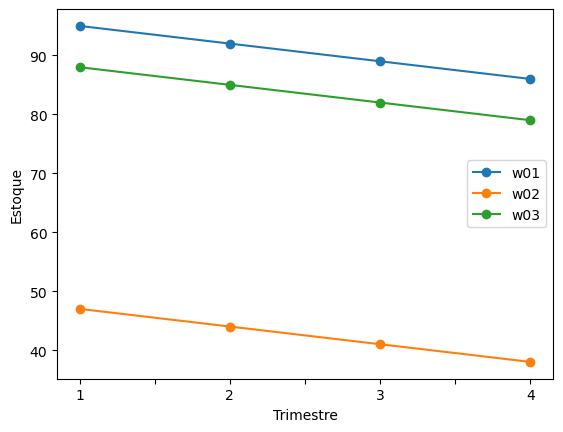

In [33]:
# visualizacao no grafico de linhas

# dataframe que foi feito para plotar o grafico
dados_trimestre.plot(x='trimestre', y=['w01', 'w02', 'w03'], kind= 'line', marker= 'o')
# titulos 
plt.xlabel('Trimestre')
plt.ylabel('Estoque')
plt.show()